In [223]:
import numpy as np 
import dexplot as dxp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
from geopy.geocoders import Nominatim
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

In [2]:
crime = pd.read_csv("Kaggle-CPE/Dept_37-00049/37-00049_UOF-P_2016_prepped.csv")
crime = crime.iloc[1:, :]
crime1 = pd.read_csv("Kaggle-CPE/Dept_24-00013/24-00013_UOF_2008-2017_prepped.csv")
crime1 = crime1.iloc[1:, :]
crime2 = pd.read_csv("Kaggle-CPE/Dept_23-00089/23-00089_UOF-P.csv")
crime2 = crime2.iloc[1:, :]
crime3 = pd.read_csv("Kaggle-CPE/Dept_11-00091/11-00091_Field-Interviews_2011-2015.csv")
crime3 = crime3.iloc[1:, :]
crime4 = pd.read_csv("Kaggle-CPE/Dept_24-00098/24-00098_Vehicle-Stops-data.csv")
crime4 = crime4.iloc[1:, :]
crime5 = pd.read_csv("Kaggle-CPE/Dept_35-00016/35-00016_UOF-OIS-P.csv")
crime5 = crime5.iloc[1:, :]
crime6 = pd.read_csv("Kaggle-CPE/Dept_35-00103/35-00103_UOF-OIS-P_prepped.csv")
crime6 = crime6.iloc[1:, :]
crime7 = pd.read_csv("Kaggle-CPE/Dept_37-00027/37-00027_UOF-P_2014-2016_prepped.csv")
crime7 = crime7.iloc[1:, :]
crime8 = pd.read_csv("Kaggle-CPE/Dept_49-00009/49-0009_UOF.csv")
crime8 = crime8.iloc[1:, :]
crime9 = pd.read_csv("Kaggle-CPE/Dept_49-00033/49-00033_Arrests_2015.csv")
crime9 = crime9.iloc[1:, :]
crime10 = pd.read_csv("Kaggle-CPE/Dept_49-00035/49-00035_Incidents_2016.csv")
crime10 = crime10.iloc[1:, :]
crime11 = pd.read_csv("Kaggle-CPE/Dept_49-00081/49-00081_Incident-Reports_2012_to_May_2015.csv")
crime11 = crime11.iloc[1:, :]


C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,5,20,25,26,27,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,5,6,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,9,10) have mixed types. Specify 

In [5]:
def convert_time(crime): 
    crime["INCIDENT_TIME"] = crime.INCIDENT_TIME.astype("str").str.lower()
    #consider case where time contains am/pm, convert to army time 
    if crime.INCIDENT_TIME.str.contains("pm").any():
        crime.loc[crime["INCIDENT_TIME"].str.contains("pm"), "INCIDENT_TIME"] = pd.to_datetime(crime.loc[crime["INCIDENT_TIME"].str.contains("pm"), "INCIDENT_TIME"]).dt.time
    #all but one of the datasets have their time formatted as ##:## or #:##
    time = crime.INCIDENT_TIME.astype("str").str.extract("(\d?\d:\d\d)")[0]
    date = pd.to_datetime(crime.INCIDENT_DATE).dt.date.astype("str")
    crime["INCIDENT_DATE"] = pd.to_datetime(date + " " + time)
    return crime

In [220]:
def plot_by_hour(crime):
    fig, ax = plt.subplots(figsize = (15, 5))
    ax = sns.countplot(pd.to_datetime(crime.INCIDENT_DATE).dt.hour[~crime.INCIDENT_DATE.isnull()].astype("int"))
    plt.title("Number of Crimes per Hour")
    plt.xlabel("Hour")
    #displaying counts for each hour bin
    for patch in ax.patches: 
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        ax.annotate(f'{int(y)}', (x.mean(), y), ha = "center", va = "bottom")

def plot_race_count(crime, race):
    fig, ax = plt.subplots(figsize = (8, 5))
    ax = sns.countplot(crime[race])
    plt.title("Number of Arrests by Race")
    #displaying counts for each race bin 
    for patch in ax.patches: 
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        ax.annotate(f'{int(y)}', (x.mean(), y), ha = "center", va = "bottom")
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90)
        
def plot_injuries_by_race(crime, race, injury):
    #allows to plot percentage by race 
    ax = dxp.aggplot(agg = race, hue = injury, data = crime, normalize = race, figsize = (10, 5))
    plt.title("Percent of Injuries by Race")
    plt.xlabel("Race")
    plt.ylabel("Percent")
    #displaying counts for each injury tyipe bin
    #this took 1 and a half hours to figure out I hate plotting 
    for p in ax.patches:
        height = p.get_height()
        if math.isnan(float(height)):
            height = 0
        ax.text(p.get_x() + p.get_width()/2, 
               height + 0.01, f"{round(height, 2)}", ha = "center")
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90)
    
def plot_police_district(crime):
    fig, ax = plt.subplots(figsize = (15, 5))
    #Most datasets have less than 25 police districts but one of them had like 200
    if len(crime.LOCATION_DISTRICT.unique()) > 25:
        top_25_districts = crime.LOCATION_DISTRICT[crime.LOCATION_DISTRICT.isin(crime.LOCATION_DISTRICT.value_counts().iloc[0:25].index)]
        ax = sns.countplot(top_25_districts)
        plt.title("Number of Crimes in Top 25 Police Districts")
    else:
        ax = sns.countplot(crime.LOCATION_DISTRICT);
        plt.title("Number of Crimes per Police District")
    #displaying counts for each police district bin 
    for patch in ax.patches: 
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        ax.annotate(f'{int(y)}', (x.mean(), y), ha = "center", va = "bottom")
    plt.xlabel("Police District")
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90);

In [234]:
#Hella for-loops 

def pipeline(filepath): 
    crime = pd.read_csv(filepath)
    crime = crime.iloc[1:, :] 
    #datasets either has time in their incident date columns or a separate time column
    time = pd.to_datetime(crime.INCIDENT_DATE).dt.time
    #so if a dataset doesn't have all their time being 0 will just plot right away
    if (time[~time.isnull()] != datetime.time(0, 0)).any():
        plot_by_hour(crime)
    else: 
        
        if "INCIDENT_TIME" in crime.columns:
            crime = convert_time(crime)
            time = crime.INCIDENT_DATE.dt.time
            #One dataset has a time column that is all 0s so need to check 
            if (time[~time.isnull()] != datetime.time(0, 0)).any():
                plot_by_hour(crime)
            else:
                print("Dataset doesn't have information on time of incidence")
        else:
            print("Dataset doesn't have information on time of incidence")
    race = 0
    
    if not pd.Series(crime.columns).str.contains("SUBJECT_RAC").any():
        print("Dataset doesn't have information on offender race")
    for i in crime.columns: 
        #Subject race was misspelled as subject ract in one dataset 
        if "SUBJECT_RAC" in i:
            race = i
            plot_race_count(crime, race)
            break
    for i in crime.columns:         
        if "SUBJECT_INJURY" in i:
            injury = i 
            if race != 0: 
                plot_injuries_by_race(crime, race, injury)
            break
    if "LOCATION_DISTRICT" in crime.columns:
        plot_police_district(crime)
    else:
        print("Dataset doesn't have information on Police District")

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2907: DtypeWarning: Columns (0,1,5,20,25,26,27,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


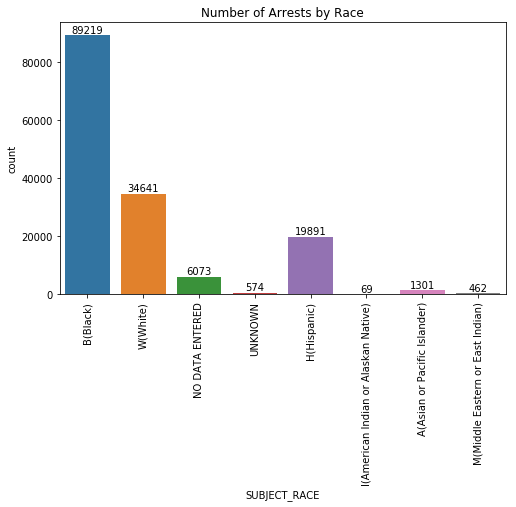

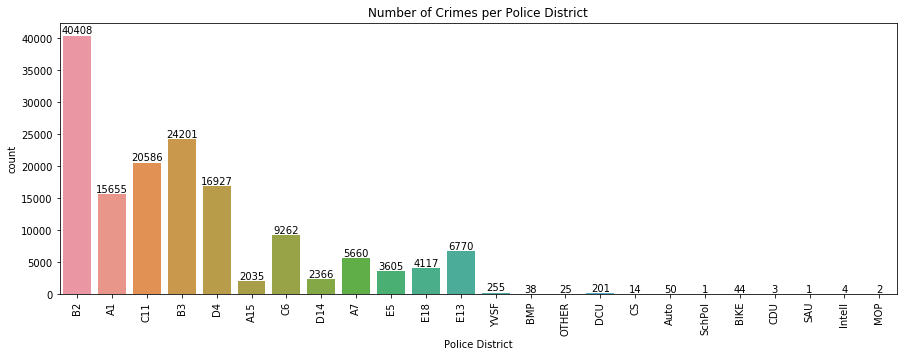

In [235]:
pipeline("Kaggle-CPE/Dept_11-00091/11-00091_Field-Interviews_2011-2015.csv")

Dataset doesn't have information on time of incidence


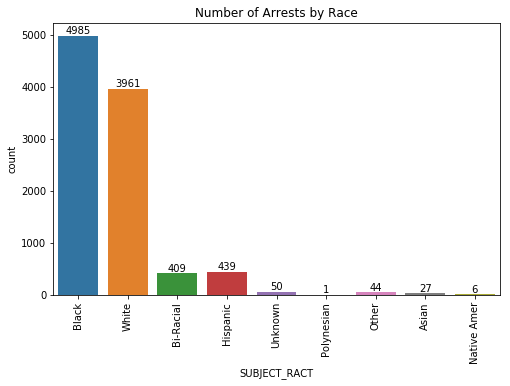

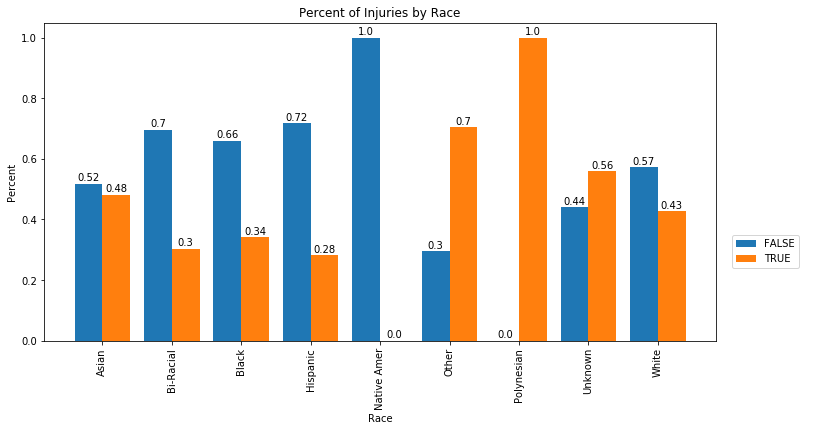

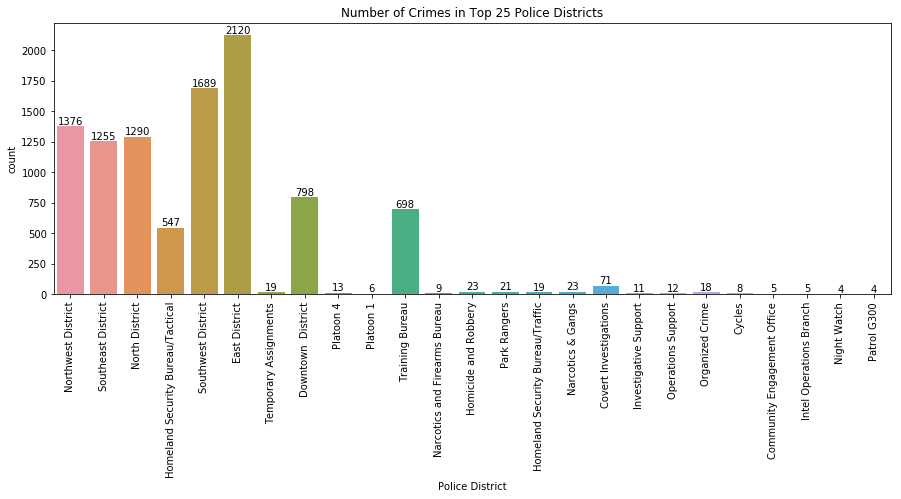

In [236]:
pipeline("Kaggle-CPE/Dept_23-00089/23-00089_UOF-P.csv")

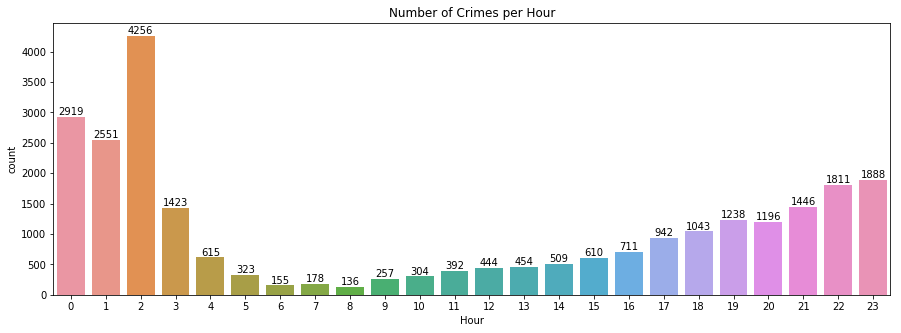

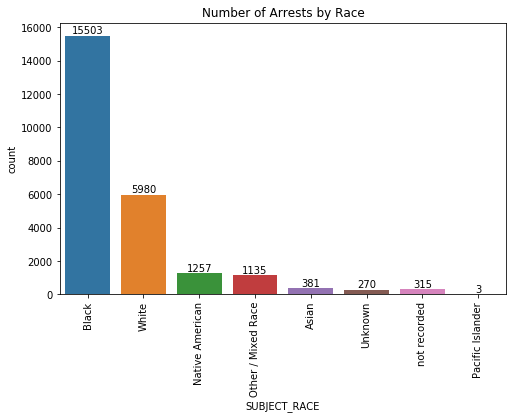

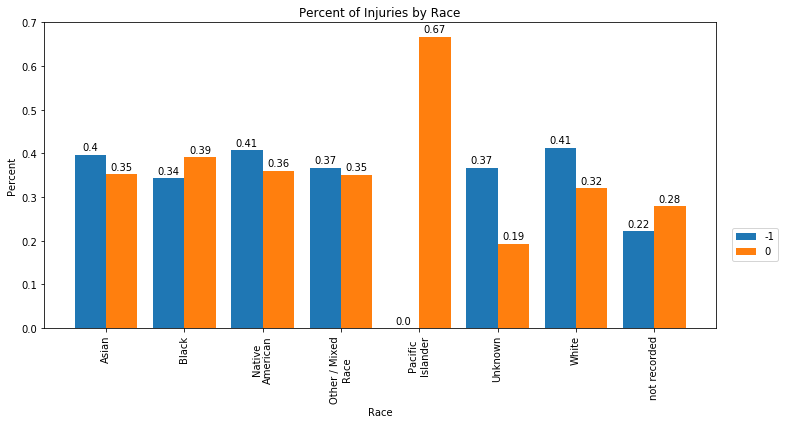

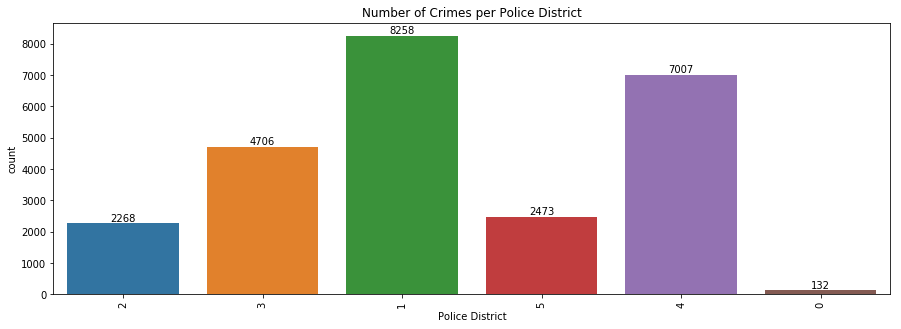

In [225]:
pipeline("Kaggle-CPE/Dept_24-00013/24-00013_UOF_2008-2017_prepped.csv")

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2907: DtypeWarning: Columns (0,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


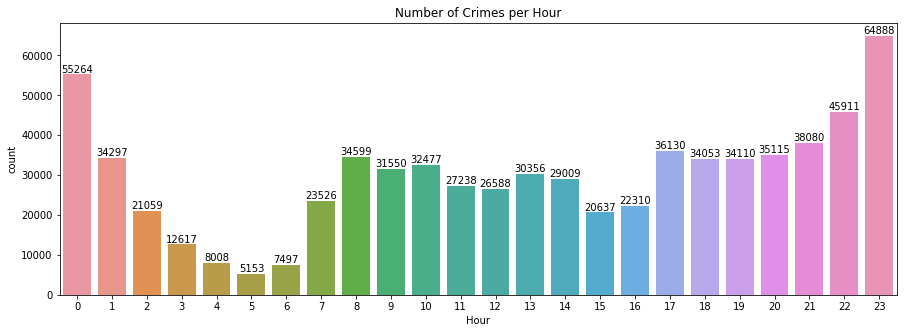

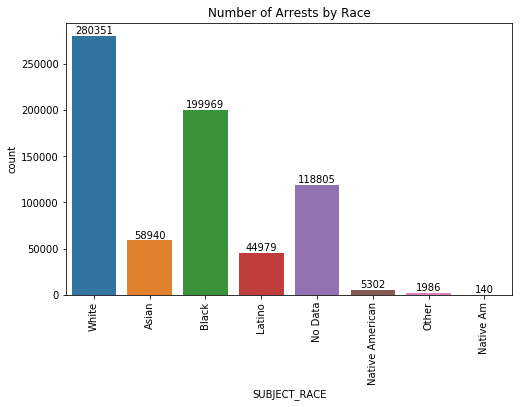

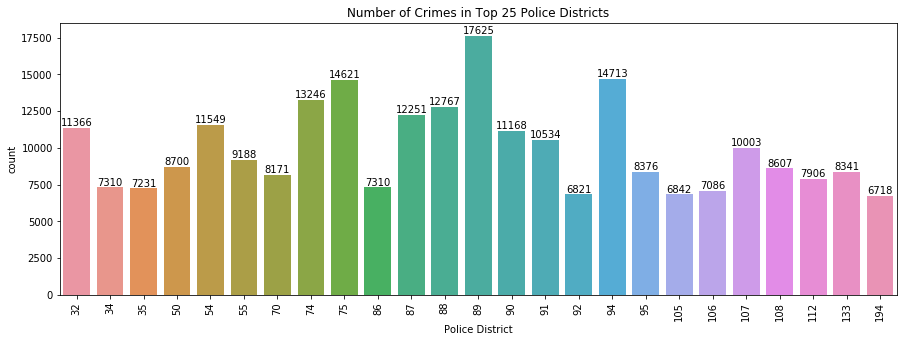

In [237]:
pipeline("Kaggle-CPE/Dept_24-00098/24-00098_Vehicle-Stops-data.csv")

Dataset doesn't have information on time of incidence
Dataset doesn't have information on Police District


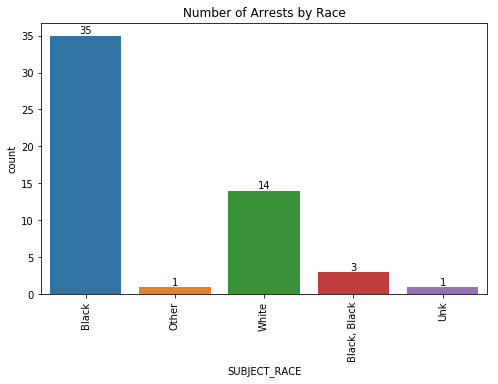

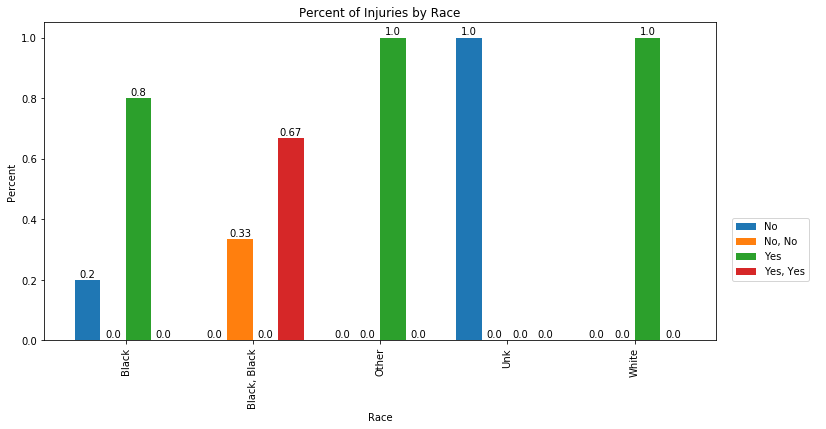

In [238]:
pipeline("Kaggle-CPE/Dept_35-00016/35-00016_UOF-OIS-P.csv")

Dataset doesn't have information on time of incidence
Dataset doesn't have information on Police District


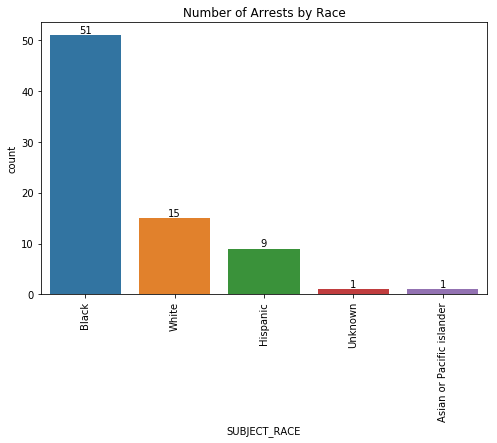

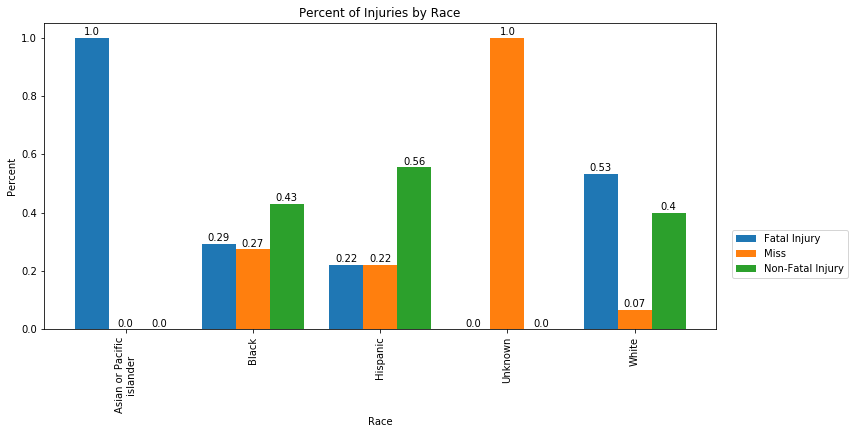

In [239]:
pipeline("Kaggle-CPE/Dept_35-00103/35-00103_UOF-OIS-P_prepped.csv")

Dataset doesn't have information on time of incidence


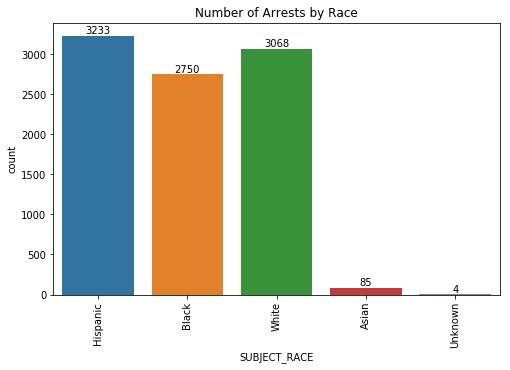

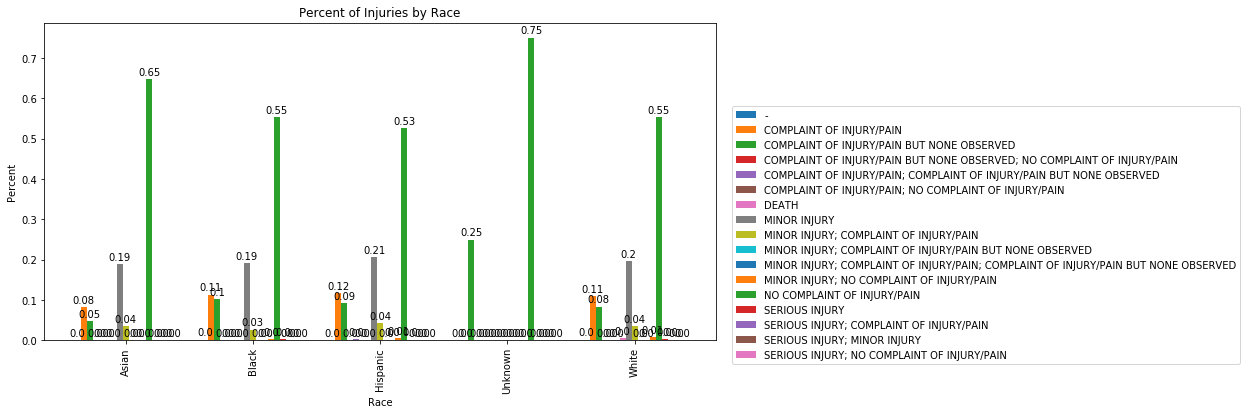

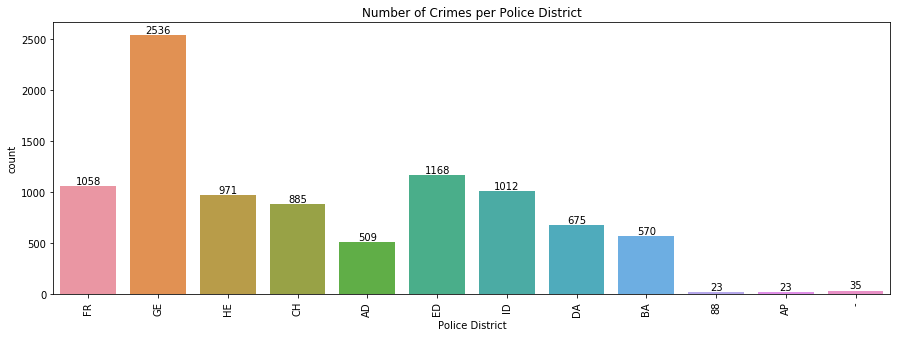

In [240]:
pipeline("Kaggle-CPE/Dept_37-00027/37-00027_UOF-P_2014-2016_prepped.csv")

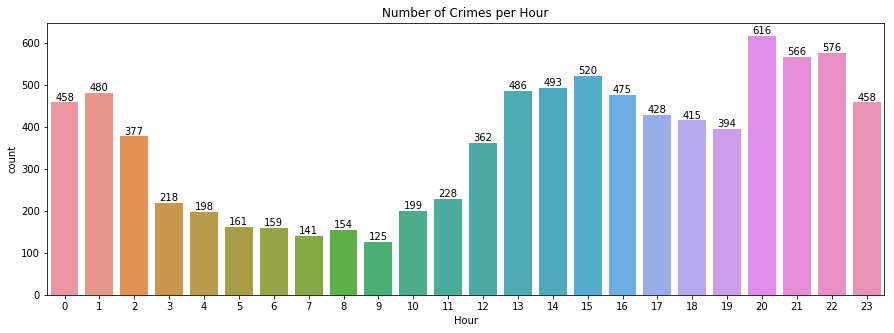

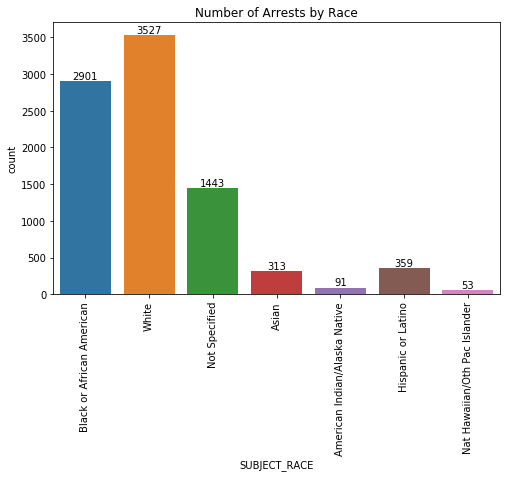

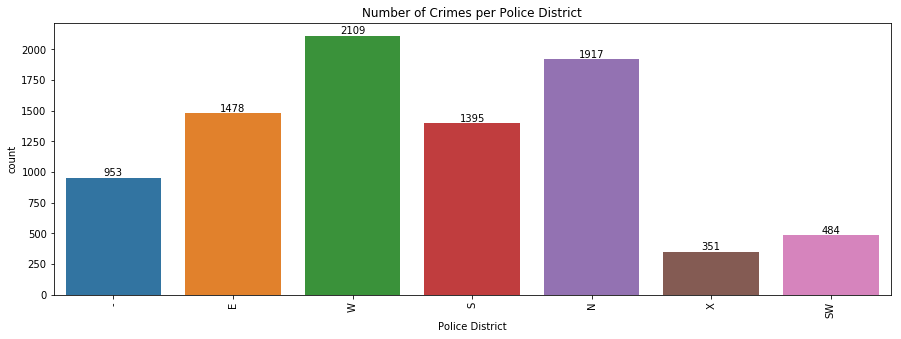

In [241]:
pipeline("Kaggle-CPE/Dept_49-00009/49-0009_UOF.csv")

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2907: DtypeWarning: Columns (1,2,3,5,6,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


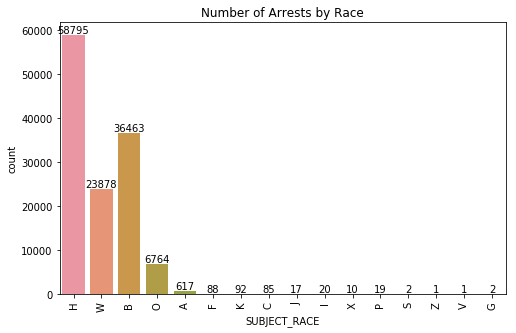

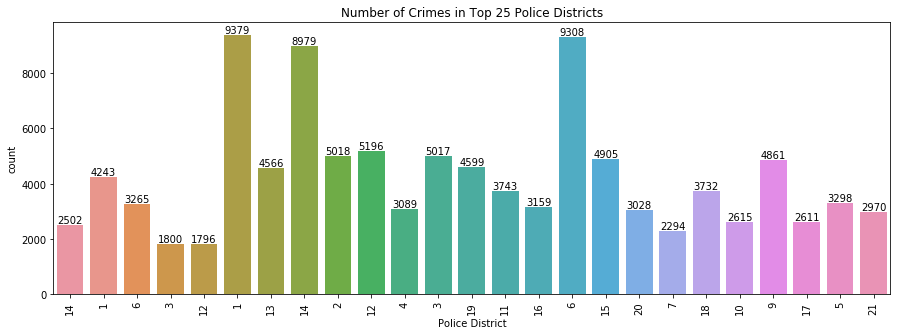

In [242]:
pipeline("Kaggle-CPE/Dept_49-00033/49-00033_Arrests_2015.csv")

Dataset doesn't have information on offender race


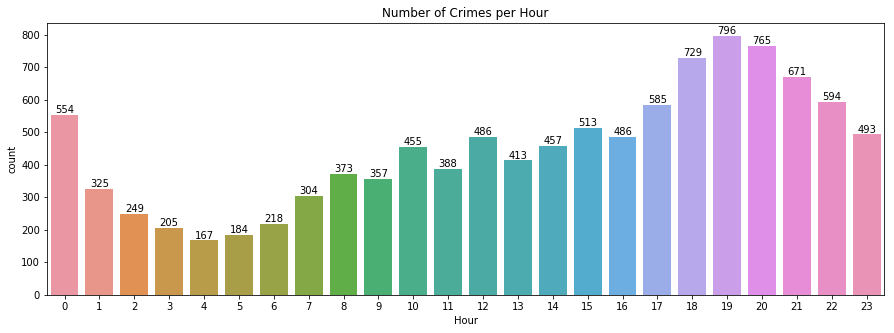

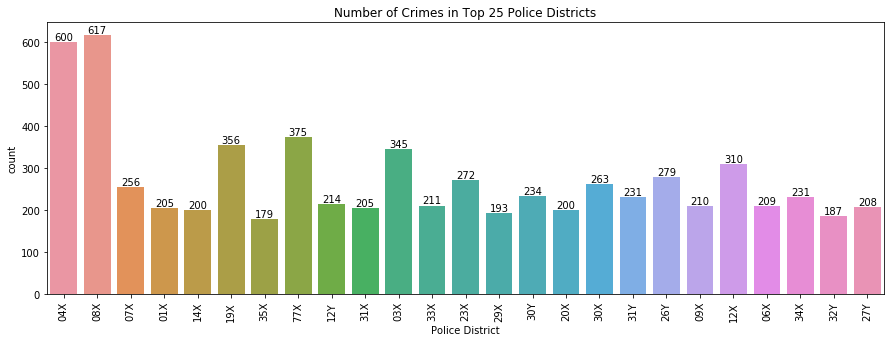

In [222]:
pipeline("Kaggle-CPE/Dept_49-00035/49-00035_Incidents_2016.csv")

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\IPython\core\interactiveshell.py:2907: DtypeWarning: Columns (0,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Dataset doesn't have information on offender race


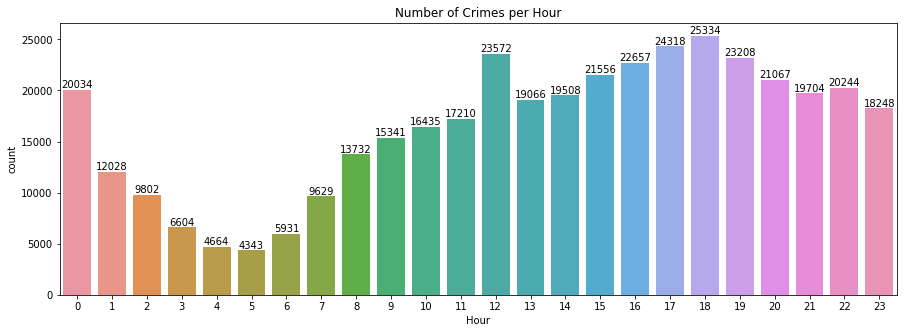

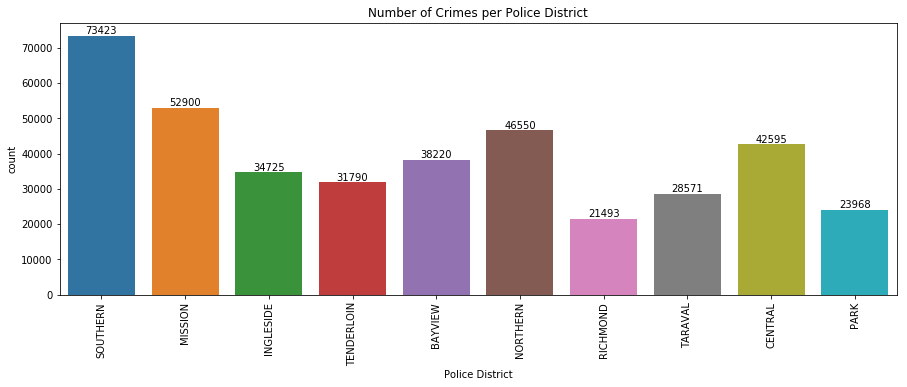

In [243]:
pipeline("Kaggle-CPE/Dept_49-00081/49-00081_Incident-Reports_2012_to_May_2015.csv")